In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from astropy.time import Time
from scipy.constants import c
from scipy.optimize import curve_fit

#%matplotlib qt

plt.rcParams['figure.figsize'] = [12, 6]
plt.rcParams['figure.facecolor'] = 'w'

In [2]:

f_carrier =  8486280070+12400+720

#8486280070-1250

print(f_carrier)

8486293190


In [3]:
data = np.fromfile('/media/scott/fast/data/20210906/all06.dat', sep = ' ').reshape((-1,4))
t_data = Time(data[:,0], format = 'mjd')
freq_data = data[:,1]

In [4]:
gmd_file = '/home/scott/code/GMAT/R2020a/output/ce5_Doppler_l1.gmd'
gmd_mjd = []
gmd_rangerate = []
with open(gmd_file) as f:
    for l in f.readlines()[2:]:
        gmd_mjd.append(float(l.split()[0]))
        gmd_rangerate.append(float(l.split()[-1]))
gmd_mjd = np.array(gmd_mjd)
gmd_rangerate = np.array(gmd_rangerate)
t_gmd = Time(gmd_mjd + (2430000.0 - 2400000.5), scale = 'tai', format = 'mjd')

In [5]:
rangerate_interp = np.interp(t_data.utc.mjd, t_gmd.utc.mjd, gmd_rangerate)
freq_gmat = f_carrier * (1 - 1e3*rangerate_interp/c)
Rr = (c * ((freq_data / f_carrier) -1))/-1000

freq_diff = freq_data - freq_gmat
np_diff = np.array(freq_diff)

Rr_diff = Rr-rangerate_interp
np_rrdiff = np.array(Rr_diff)

print(rangerate_interp)

[-0.2635375  -0.26352233 -0.26350578 ... -0.23745516 -0.23740978
 -0.23737995]


/home/scott/.local/lib/python3.6/site-packages/IPython/core/pylabtools.py:132: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


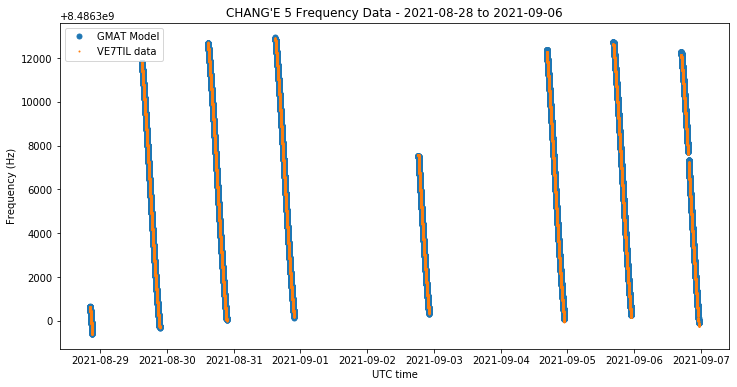

In [6]:

plt.plot(t_data.datetime, freq_gmat,'.', markersize=10,alpha=1,label = 'GMAT Model')
plt.plot(t_data.datetime,freq_data,'.' ,markersize=2, alpha=1, label = 'VE7TIL data')
plt.title('CHANG\'E 5 Frequency Data - %s to %s'%(t_data.datetime[0].strftime('%Y-%m-%d'), t_data.datetime[len(freq_data)-1].strftime('%Y-%m-%d')))
plt.ylabel('Frequency (Hz)')
plt.xlabel('UTC time')
plt.legend()
plt.show();

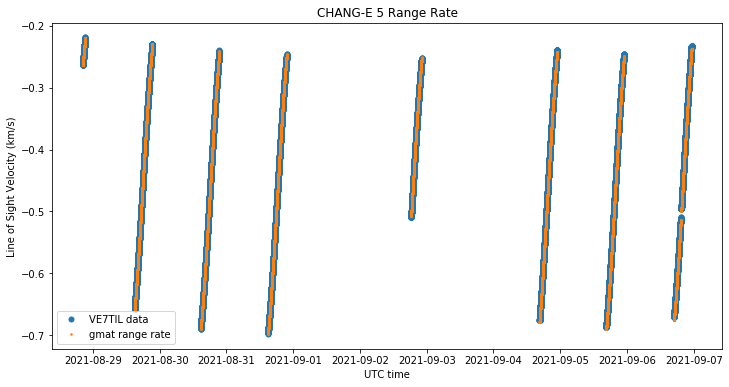

In [7]:
plt.plot(t_data.datetime, Rr, '.',markersize=10,alpha=1,label = 'VE7TIL data')
plt.plot(t_data.datetime,rangerate_interp, '.',markersize=3, alpha=2, label = 'gmat range rate')
plt.title('CHANG-E 5 Range Rate - %s to %s'%(t_data.datetime[0].strftime('%Y-%m-%d'), t_data.datetime[len(freq_data)-1].strftime('%Y-%m-%d')))
plt.title('CHANG-E 5 Range Rate')
plt.ylabel('Line of Sight Velocity (km/s)')
plt.xlabel('UTC time')
plt.legend()
plt.show();

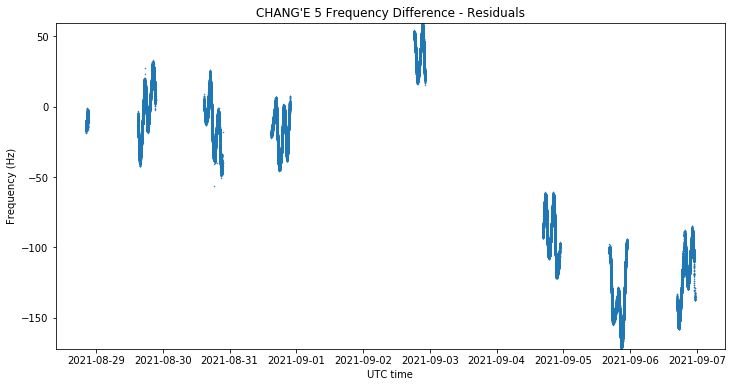

In [8]:
plt.ylim(np.min(np_diff), np.max(np_diff))
plt.plot(t_data.datetime, freq_data - freq_gmat,'.',markersize=1,  label = 'strf file')
plt.title('CHANG\'E 5 Frequency Difference - Residuals')
plt.ylabel('Frequency (Hz)')
plt.xlabel('UTC time')
plt.show();

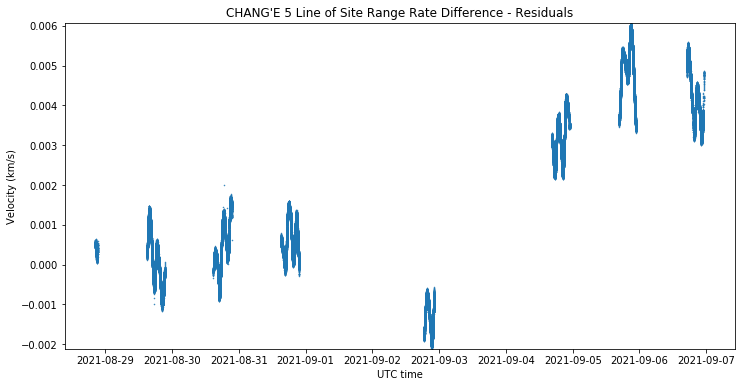

In [9]:
plt.ylim(np.min(np_rrdiff), np.max(np_rrdiff))
plt.plot(t_data.datetime, Rr - rangerate_interp,'.',markersize=1,  label = 'strf file')
plt.title('CHANG\'E 5 Line of Site Range Rate Difference - Residuals')
plt.ylabel('Velocity (km/s)')
plt.xlabel('UTC time')
plt.show();